In [1]:
from bs4 import BeautifulSoup
from scipy import stats

In [2]:
import re
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Perform General data analysis**

**Performing general data analysis involves several steps.Those are,**

**1.Data Collection:**

**-Obtain the dataset from a reliable source.**

**2.Data Cleaning:**

 **- Check for missing values,inconsistencies in the data.**
 
**- Handle missing data through imputation or removal.**

 **- Standardize data formats.**
 
**3.Exploratory Data Analysis (EDA):**

 **- Visualize the data using graphs, histograms, box plots, Pie charts etc.,**
**- to understand the distribution,relationships and patterns.**

 Here we took online platform called "Makaan",it is to buy residential property in bangalore and the availability based on the flats, and the range of prices according to the area. 

In [3]:
url='https://www.makaan.com/bangalore-residential-property/buy-property-in-bangalore-city'

In [4]:
page=requests.get(url)

In [5]:
page

<Response [200]>

In [6]:
page.status_code

200

In [7]:
soup=BeautifulSoup(page.text)

In [8]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><title>Property for Sale in Bangalore | 53699+ Bangalore Properties for sale</title><meta content="Find 53699+ Properties for sale in Bangalore on Makaan.com. Search ✓5972+ Houses/Villas for sale. ✓6224+ New Projects. ✓34798+ Apartments for sale. Book Now !" name="description"/><meta content="Buy Bangalore Properties, Residential Property for sale in Bangalore, Property for sale in Bangalore, Bangalore Property Sale" name="keywords"/><meta content="#fff" id="themeColor" name="theme-color"/><meta content="origin" name="referrer"/><meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/><meta content="155462194517712" name="fb:pages"/><meta content="India" name="country"/><meta content="website" name="og:type"/><meta content="Makaan.com" name="og:site_name"/><meta content="http://static.makaan.com/6/2/355/7975867.jpeg" name="og:image:url"/><meta content="Property for 

In [9]:
a=soup.find_all("div",class_="title-line")

In [10]:
a

[<div class="title-line"><a class="typelink" data-type="listing-link" href="https://www.makaan.com/bangalore/casagrand-builder-private-limited-casagrand-meridian-in-krishnarajapura-20640033/3bhk-2037-sqft-apartment" itemprop="url" target="_blank"><meta content="3 BHK Apartment for sale" id="itemNameFor-20640033" itemprop="name"/><strong><span class="val">3 </span><span>BHK </span><span>Apartment</span></strong></a><span class="project-wrap"> in <strong><a class="projName" data-link-name="CasaGrand Casagrand Meridian" data-link-type="project overview" data-track-label="20640033_1_3228421_select" data-type="projName" href="https://www.makaan.com/bangalore/casagrand-builder-private-limited-casagrand-meridian-in-krishnarajapura-3228421" target="_blank" title="Go to CasaGrand Casagrand Meridian"><span>CasaGrand Casagrand Meridian</span></a></strong></span><div class="rera-tag-new" title="Rera Approved Project"><img alt="Rera Approved Project" src="//static.makaan.com/images/un-versioned/rer

In [11]:
for i in a:
    print(i.text)

3 BHK Apartment in CasaGrand Casagrand Meridian
2 BHK Apartment in CBR Sarasthira
2 BHK Apartment in Shree Nandana Elite
3 BHK Apartment in Puravankara Purva Meraki
2 BHK Apartment in RRL Nature Woods
3 BHK Apartment in Sattva Sattva Misty Charm
Residential Plot in Saroj Whispering Winds
Residential Plot in Guru Punvaanii Guru Punvaanii Eka
3 BHK Apartment in Navami Landmaark
2 BHK Apartment in V Venture EVA
Residential Plot in Dukes Legend Sujay
3 BHK Apartment in Unique Feronia
Residential Plot in LTG Aishwarya Indraprastha
4 BHK Apartment in SNN Clermont
3 BHK Apartment in Hoysala Hallmark Lalith
Residential Plot in RBD RBD Meadows
2 BHK Apartment in Sumadhura Aspire Amber
2 BHK Apartment in Jhanavi Noreste
3 BHK Apartment in Bavisha Meadows
1 BHK Apartment in GRC Subhiksha


In [ ]:
#Location = ['Koramangala' ,'Bellandur' ,'Indira Nagar','Elecronic City' ,'HSR Layout' ,'Sarjapur' ,'Ulsoor' ,'Richmond_town' ,'Devanahalli' ,'Seshadripuram' ,'Malleswaram']
Name_of_the_flat = []
Location = []
Type_of_House=[]
Type_of_BHK = []
Area_in_sq_ft = []
Construction_Status = []
Facing = [] 
#Nearby = []
New_or_Resale = []
Property_Price = []
pins=[50317 ,50270 ,50162 ,60730  ,50387 ,51641 ,50159 ,50160 ,50174 ,51512 ,50181]
for j in pins:
    for i in range(1,11):
        url=f"https://www.makaan.com/bangalore-property/malleswaram-flats-for-sale-{j}?page={i}"
        page=requests.get(url)
        soup=BeautifulSoup(page.text)
        container=soup.find_all("li",class_="cardholder")
        for i in container:
            a=i.find("td",class_="price")
            if a:
                Property_Price.append(a.text)
            else:
                Property_Price.append(np.nan)
        for i in container:
            i.find("div",class_="title-line-wrap")
            reg=re.findall("(\d\sBHK)",i.text)       
            if reg:
                Type_of_BHK.append(reg[0])
            else:
                Type_of_BHK.append(np.nan)
        for i in container:
            i.find("div",class_='title-line-wrap')
            regex=re.findall("((?:Koramangala|Bellandur|Indira Nagar|Electronics City|HSR Layout|Sarjapur|Ulsoor|Richmond_town|Devanahalli|Seshadripuram|Malleswaram]))" ,i.text)
            if regex:
                Location.append(regex[0])
            else:
                Location.append(np.nan)
                
        for i in container:
            a=i.find('td',class_='size')
            if a:
              Area_in_sq_ft.append(a.text)
            else:
              Area_in_sq_ft.append(np.nan)
            
        for i in container:
            a=i.find('td',class_='val')
            if a:
             Construction_Status.append(a.text)
            else:
             Construction_Status.append(np.nan)
            
        for i in container:
            i.find("ul",class_="listing-details")
            reg=re.findall("(\w+\sfacing)",i.text)
            if reg:
                Facing.append(reg[0])
            else:
                Facing.append(np.nan)  
                
        for i in container:
            a=i.find('li',class_='keypoint')
            if a:
             New_or_Resale.append(a.text)
            else:
             New_or_Resale.append(np.nan)
        
        for i in container:
            i.find("div",class_="title-line-wrap")
            reg=re.findall("((?:Apartment|Villa|Independent|Flat))",i.text)       
            if reg:
                Type_of_House.append(reg[0])
            else:
                Type_of_House.append(np.nan)

In [13]:
print(len(Facing))
print(len(New_or_Resale))
print(len(Type_of_House))
print(len(Type_of_House))
print(len(Construction_Status))
print(len(Area_in_sq_ft))
print(len(Location))
print(len(Property_Price))
print(len(Type_of_BHK))

1696
1696
1696
1696
1696
1696
1696
1696
1696


In [14]:
Flats_Data = { 
               'Type of House' : Type_of_House ,
               'Type of BHK'  : Type_of_BHK ,
               'Location' :  Location ,
               'Area in sq.ft' : Area_in_sq_ft,
               'Construction Status' : Construction_Status,
               'Facing' : Facing ,
               'New_or_Resale' : New_or_Resale ,
               'PropertyPrice in lakhs' : Property_Price ,
             }
df= pd.DataFrame(Flats_Data)

In [15]:
df=df.dropna()

In [16]:
len(df)

423

In [17]:
df

,Type of House,Type of BHK,Location,Area in sq.ft,Construction Status,Facing,New_or_Resale,PropertyPrice in lakhs
1,Independent,4 BHK,Koramangala,4500,Ready to move,East facing,4 Bathrooms,10.5 Cr
7,Independent,3 BHK,Koramangala,2000,Ready to move,East facing,3 Bathrooms,2.75 Cr
8,Apartment,3 BHK,Koramangala,1744,Ready to move,is facing,18 - 19 years old,2.29 Cr
13,Villa,0 BHK,Koramangala,6000,Ready to move,South facing,9 Bathrooms,4 Cr
15,Apartment,3 BHK,Koramangala,1945,Ready to move,East facing,3 Bathrooms,2 Cr
...,...,...,...,...,...,...,...,...
1496,Apartment,3 BHK,Devanahalli,1700,Under Construction,East facing,3 Bathrooms,1.8 Cr
1505,Villa,4 BHK,Devanahalli,4400,Under Construction,East facing,6 Bathrooms,5.8 Cr
1511,Villa,4 BHK,Devanahalli,2400,Under Construction,east facing,Possession by Mar 2024,1.4 Cr
1648,Apartment,3 BHK,Seshadripuram,3783,Ready to move,is facing,4 - 5 years old,10 Cr


In [18]:
df.to_csv("REALESTATE_PROJECT.csv" ,index=None )

In [19]:
df=pd.read_csv("REALESTATE_PROJECT.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Type of House           423 non-null    object
 1   Type of BHK             423 non-null    object
 2   Location                423 non-null    object
 3   Area in sq.ft           423 non-null    int64 
 4   Construction Status     423 non-null    object
 5   Facing                  423 non-null    object
 6   New_or_Resale           423 non-null    object
 7   PropertyPrice in lakhs  423 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.6+ KB


In [21]:
names_of_flats = [
    'Sai Towers', 'Bhrundavan Gardens', 'Hanuman Enclaves', 'Prestige Park Grove',
    'Prestige Eden Park', 'Prestige Meridian Park', 'Prestige Avalon Park',
    'Prestige Aston Park', 'The Prestige City', 'Mahindra Eden',
    'Brigade Komarla Heights', 'Prestige Green Gables'
]

In [22]:
flat_names_repeated = [names_of_flats[i % len(names_of_flats)] for i in range(517)]

In [23]:
df

,Type of House,Type of BHK,Location,Area in sq.ft,Construction Status,Facing,New_or_Resale,PropertyPrice in lakhs
0,Independent,4 BHK,Koramangala,4500,Ready to move,East facing,4 Bathrooms,10.5 Cr
1,Independent,3 BHK,Koramangala,2000,Ready to move,East facing,3 Bathrooms,2.75 Cr
2,Apartment,3 BHK,Koramangala,1744,Ready to move,is facing,18 - 19 years old,2.29 Cr
3,Villa,0 BHK,Koramangala,6000,Ready to move,South facing,9 Bathrooms,4 Cr
4,Apartment,3 BHK,Koramangala,1945,Ready to move,East facing,3 Bathrooms,2 Cr
...,...,...,...,...,...,...,...,...
418,Apartment,3 BHK,Devanahalli,1700,Under Construction,East facing,3 Bathrooms,1.8 Cr
419,Villa,4 BHK,Devanahalli,4400,Under Construction,East facing,6 Bathrooms,5.8 Cr
420,Villa,4 BHK,Devanahalli,2400,Under Construction,east facing,Possession by Mar 2024,1.4 Cr
421,Apartment,3 BHK,Seshadripuram,3783,Ready to move,is facing,4 - 5 years old,10 Cr


In [24]:
df["Facing"].replace({"east facing":"East facing","south facing":"South facing","west facing":"West facing"},regex=True,inplace=True)

In [25]:
df.isnull().sum()

Type of House             0
Type of BHK               0
Location                  0
Area in sq.ft             0
Construction Status       0
Facing                    0
New_or_Resale             0
PropertyPrice in lakhs    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Type of House           423 non-null    object
 1   Type of BHK             423 non-null    object
 2   Location                423 non-null    object
 3   Area in sq.ft           423 non-null    int64 
 4   Construction Status     423 non-null    object
 5   Facing                  423 non-null    object
 6   New_or_Resale           423 non-null    object
 7   PropertyPrice in lakhs  423 non-null    object
dtypes: int64(1), object(7)
memory usage: 26.6+ KB


In [27]:
type(df.Location.isnull().sum())

numpy.int64

In [28]:
type(df['Type of House'].isnull().sum())

numpy.int64

In [29]:
type(df['Type of BHK'].isnull().sum())

numpy.int64

In [30]:
type(df['Area in sq.ft'].isnull().sum())

numpy.int64

In [31]:
type(df['Construction Status'].isnull().sum())

numpy.int64

In [32]:
type(df['Facing'].isnull().sum())

numpy.int64

In [33]:
type(df['New_or_Resale'].isnull().sum())

numpy.int64

In [34]:
type(df['PropertyPrice in lakhs'].isnull().sum())

numpy.int64

In [35]:
df=df[(df['Facing']!='is facing')]
df.reset_index(drop=True ,inplace =True)

In [36]:
df=df[(df['Facing']!='is facing')]
df.reset_index(drop=True , inplace = True)

In [37]:
df

,Type of House,Type of BHK,Location,Area in sq.ft,Construction Status,Facing,New_or_Resale,PropertyPrice in lakhs
0,Independent,4 BHK,Koramangala,4500,Ready to move,East facing,4 Bathrooms,10.5 Cr
1,Independent,3 BHK,Koramangala,2000,Ready to move,East facing,3 Bathrooms,2.75 Cr
2,Villa,0 BHK,Koramangala,6000,Ready to move,South facing,9 Bathrooms,4 Cr
3,Apartment,3 BHK,Koramangala,1945,Ready to move,East facing,3 Bathrooms,2 Cr
4,Independent,4 BHK,Koramangala,2800,Ready to move,East facing,4 Bathrooms,2.6 Cr
...,...,...,...,...,...,...,...,...
380,Apartment,3 BHK,Devanahalli,1150,Under Construction,NorthEast facing,2 Bathrooms,50 L
381,Apartment,2 BHK,Devanahalli,1290,Ready to move,South facing,2 Bathrooms,87 L
382,Apartment,3 BHK,Devanahalli,1700,Under Construction,East facing,3 Bathrooms,1.8 Cr
383,Villa,4 BHK,Devanahalli,4400,Under Construction,East facing,6 Bathrooms,5.8 Cr


In [38]:
df["PropertyPrice in lakhs"]

0       10.5 Cr
1       2.75 Cr
2          4 Cr
3          2 Cr
4        2.6 Cr
         ...   
380        50 L
381        87 L
382      1.8 Cr
383      5.8 Cr
384      1.4 Cr
Name: PropertyPrice in lakhs, Length: 385, dtype: object

In [39]:
df["PropertyPrice in lakhs"]= df["PropertyPrice in lakhs"].replace({"L":"*1","Cr":"*1e2"},regex=True).map(pd.eval).astype(int)

In [40]:
PriceRange=[]
for i in df["PropertyPrice in lakhs"]:
    if i<150:
        PriceRange.append("Low")
    elif (i>150) & (i<350):
        PriceRange.append("Medium")
    elif(i>350) & (i<500):
        PriceRange.append("High")
    else:
        PriceRange.append("Very High")
df["PriceRange"]=PriceRange

In [41]:
df

,Type of House,Type of BHK,Location,Area in sq.ft,Construction Status,Facing,New_or_Resale,PropertyPrice in lakhs,PriceRange
0,Independent,4 BHK,Koramangala,4500,Ready to move,East facing,4 Bathrooms,1050,Very High
1,Independent,3 BHK,Koramangala,2000,Ready to move,East facing,3 Bathrooms,275,Medium
2,Villa,0 BHK,Koramangala,6000,Ready to move,South facing,9 Bathrooms,400,High
3,Apartment,3 BHK,Koramangala,1945,Ready to move,East facing,3 Bathrooms,200,Medium
4,Independent,4 BHK,Koramangala,2800,Ready to move,East facing,4 Bathrooms,260,Medium
...,...,...,...,...,...,...,...,...,...
380,Apartment,3 BHK,Devanahalli,1150,Under Construction,NorthEast facing,2 Bathrooms,50,Low
381,Apartment,2 BHK,Devanahalli,1290,Ready to move,South facing,2 Bathrooms,87,Low
382,Apartment,3 BHK,Devanahalli,1700,Under Construction,East facing,3 Bathrooms,180,Medium
383,Villa,4 BHK,Devanahalli,4400,Under Construction,East facing,6 Bathrooms,580,Very High


In [42]:
df.to_csv("project_cleaned_data.csv")

In [43]:
df

,Type of House,Type of BHK,Location,Area in sq.ft,Construction Status,Facing,New_or_Resale,PropertyPrice in lakhs,PriceRange
0,Independent,4 BHK,Koramangala,4500,Ready to move,East facing,4 Bathrooms,1050,Very High
1,Independent,3 BHK,Koramangala,2000,Ready to move,East facing,3 Bathrooms,275,Medium
2,Villa,0 BHK,Koramangala,6000,Ready to move,South facing,9 Bathrooms,400,High
3,Apartment,3 BHK,Koramangala,1945,Ready to move,East facing,3 Bathrooms,200,Medium
4,Independent,4 BHK,Koramangala,2800,Ready to move,East facing,4 Bathrooms,260,Medium
...,...,...,...,...,...,...,...,...,...
380,Apartment,3 BHK,Devanahalli,1150,Under Construction,NorthEast facing,2 Bathrooms,50,Low
381,Apartment,2 BHK,Devanahalli,1290,Ready to move,South facing,2 Bathrooms,87,Low
382,Apartment,3 BHK,Devanahalli,1700,Under Construction,East facing,3 Bathrooms,180,Medium
383,Villa,4 BHK,Devanahalli,4400,Under Construction,East facing,6 Bathrooms,580,Very High


In [44]:
df.New_or_Resale

0                 4 Bathrooms
1                 3 Bathrooms
2                 9 Bathrooms
3                 3 Bathrooms
4                 4 Bathrooms
                ...          
380               2 Bathrooms
381               2 Bathrooms
382               3 Bathrooms
383               6 Bathrooms
384    Possession by Mar 2024
Name: New_or_Resale, Length: 385, dtype: object

In [45]:
df['New_or_Resale'] = df['New_or_Resale'].str.replace('Bathrooms', 'years ago')

In [46]:
df

,Type of House,Type of BHK,Location,Area in sq.ft,Construction Status,Facing,New_or_Resale,PropertyPrice in lakhs,PriceRange
0,Independent,4 BHK,Koramangala,4500,Ready to move,East facing,4 years ago,1050,Very High
1,Independent,3 BHK,Koramangala,2000,Ready to move,East facing,3 years ago,275,Medium
2,Villa,0 BHK,Koramangala,6000,Ready to move,South facing,9 years ago,400,High
3,Apartment,3 BHK,Koramangala,1945,Ready to move,East facing,3 years ago,200,Medium
4,Independent,4 BHK,Koramangala,2800,Ready to move,East facing,4 years ago,260,Medium
...,...,...,...,...,...,...,...,...,...
380,Apartment,3 BHK,Devanahalli,1150,Under Construction,NorthEast facing,2 years ago,50,Low
381,Apartment,2 BHK,Devanahalli,1290,Ready to move,South facing,2 years ago,87,Low
382,Apartment,3 BHK,Devanahalli,1700,Under Construction,East facing,3 years ago,180,Medium
383,Villa,4 BHK,Devanahalli,4400,Under Construction,East facing,6 years ago,580,Very High


**1.Find the outliers**

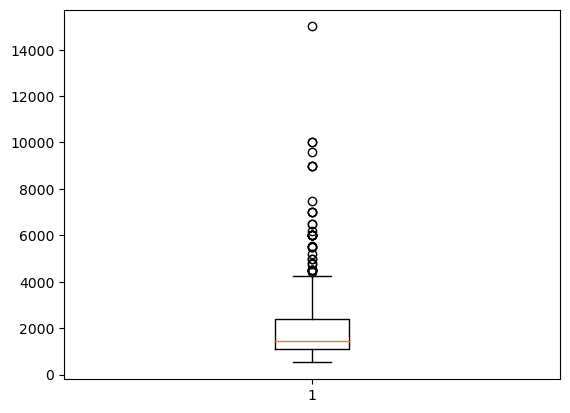

In [47]:
zscore=stats.zscore(df['Area in sq.ft'])
outlier =( zscore >3 )| (zscore<-3 )
Q1=df['Area in sq.ft'].quantile(0.25)
Q3=df['Area in sq.ft'].quantile(0.75)
IQR = Q3 -Q1
outliers = (df['Area in sq.ft'] < (Q1-1.5 *IQR)) | (df['Area in sq.ft']> (IQR+1.5 * IQR))
plt.boxplot(df['Area in sq.ft'])
plt.show()

In [48]:
df.columns

Index(['Type of House', 'Type of BHK', 'Location', 'Area in sq.ft',
       'Construction Status', 'Facing', 'New_or_Resale',
       'PropertyPrice in lakhs', 'PriceRange'],
      dtype='object')

**2.Find out the count of flats available in every area by using plot.**

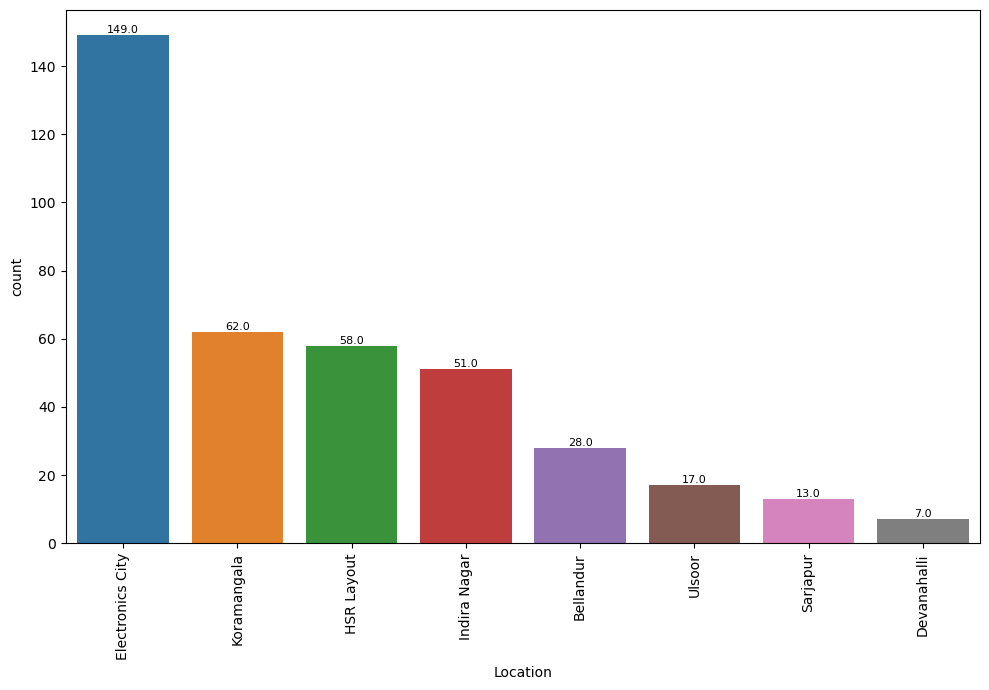

In [49]:
plt.figure(figsize=(10,7))
a=sns.countplot(x='Location',data=df ,order=df['Location'].value_counts().index)
plt.xticks(rotation=90)
for p in a.patches:
    a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.show()

In [50]:
#Location = ['Koramangala' ,'Bellandur' ,'Indira Nagar','Elecronic City' ,'HSR Layout' ,'Sarjapur' ,'Ulsoor' ,'Richmond_town' ,'Devanahalli' ,'Seshadripuram' ,'Malleswaram']


**3.Find out the total count of Apartments,Independent House and Villas by using pie chart.**

In [51]:
a1 =pd.DataFrame(df["Type of House"].value_counts())
a1

,Type of House
Apartment,278
Independent,87
Villa,20


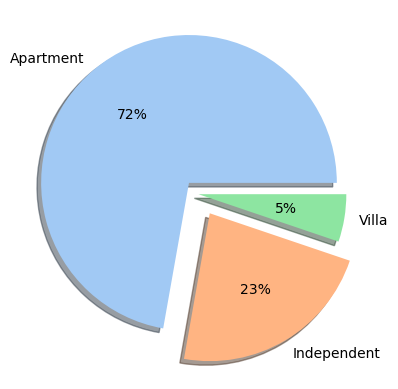

In [52]:
colors = sns.color_palette('pastel')[0:3]
plt.pie(a1["Type of House"], labels = a1.index,colors=colors, autopct='%.0f%%',radius=1,explode=[0.1,0.15,0],shadow=True)
plt.show()

**4.What is the price range in all areas, To satisfy all the customers,Show by using bar graph.**

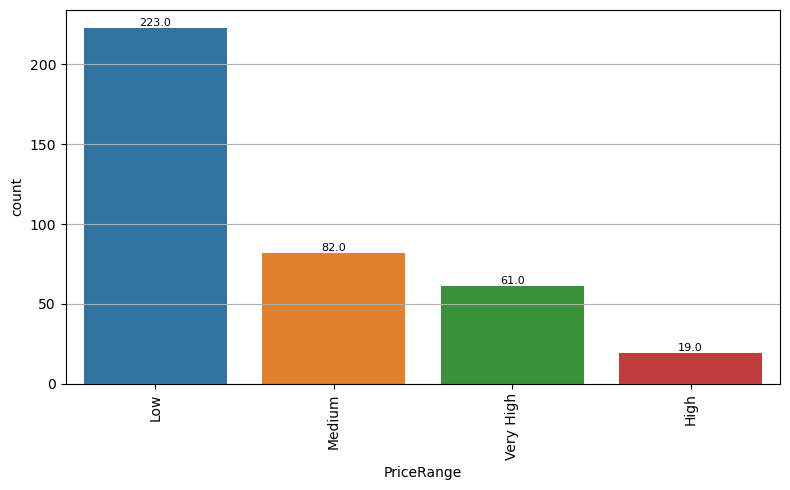

In [54]:
plt.figure(figsize=(8, 5))
plt.grid()
colors = sns.color_palette('pastel')[0:4]
a=sns.countplot(x='PriceRange',data=df,order=df['PriceRange'].value_counts().index)
plt.xticks(rotation=90)
for p in a.patches:
    a.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')
plt.tight_layout()
plt.show()

**5.What type of houses "Number of BHK" available in every area.**

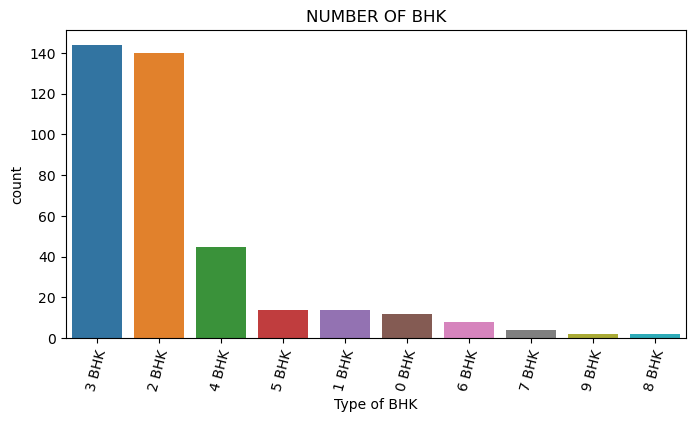

In [55]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["Type of BHK"],order=df["Type of BHK"].value_counts().index)
plt.xticks(rotation=75)
plt.title("NUMBER OF BHK")
plt.show()

**6.Show me the price range by using Histogram.**

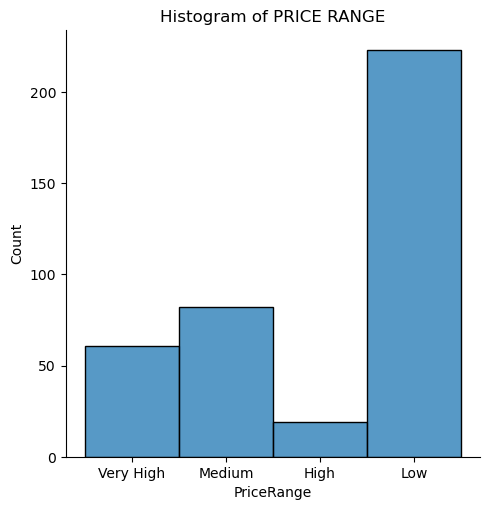

In [56]:
sns.displot(df["PriceRange"],kde=False,bins = ['Very High','High','Medium','Low'])
plt.title('Histogram of PRICE RANGE')
plt.show()

In [57]:
a =pd.DataFrame(df["Type of BHK"].value_counts())
a

,Type of BHK
3 BHK,144
2 BHK,140
4 BHK,45
5 BHK,14
1 BHK,14
0 BHK,12
6 BHK,8
7 BHK,4
9 BHK,2
8 BHK,2


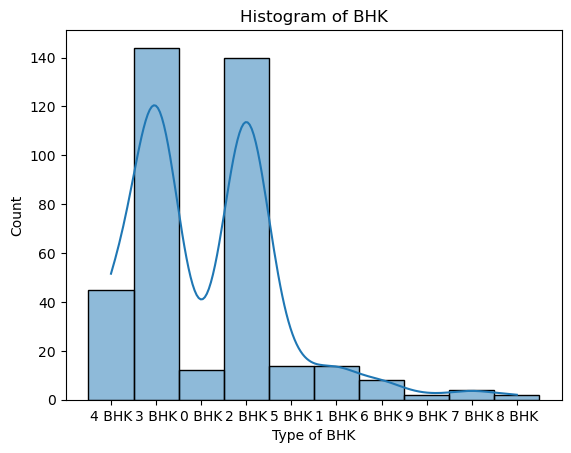

In [58]:
sns.histplot(df["Type of BHK"],kde=True)
plt.title('Histogram of BHK')
plt.show()

In [59]:
crosstab = pd.crosstab(df['Location'], df['Type of BHK'])
crosstab

Type of BHK,0 BHK,1 BHK,2 BHK,3 BHK,4 BHK,5 BHK,6 BHK,7 BHK,8 BHK,9 BHK
Location,,,,,,,,,,
Bellandur,0,0,14,13,0,1,0,0,0,0
Devanahalli,0,0,3,2,2,0,0,0,0,0
Electronics City,4,9,84,46,2,0,1,2,1,0
HSR Layout,1,0,9,28,8,3,6,1,1,1
Indira Nagar,1,0,10,25,10,3,0,1,0,1
Koramangala,5,3,10,20,16,7,1,0,0,0
Sarjapur,0,1,3,6,3,0,0,0,0,0
Ulsoor,1,1,7,4,4,0,0,0,0,0


**7.Show the type of houses available in each area.**

<Axes: xlabel='Location'>

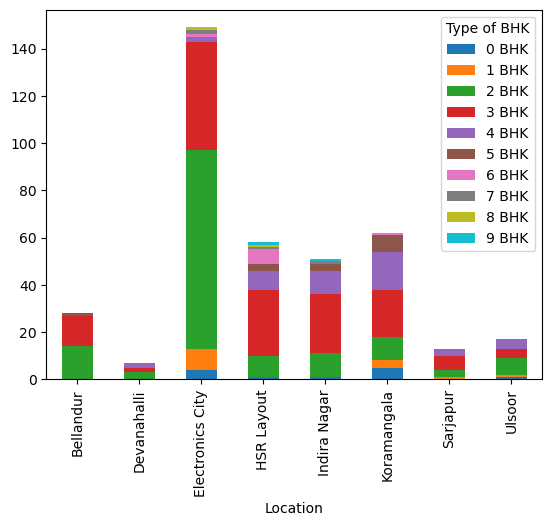

In [60]:
crosstab.plot(kind="bar", 
                 stacked=True)

**8.In which area the flats rate is high according to the survey.show by using plot.**

In [63]:
df.groupby("Location")["PropertyPrice in lakhs"].agg(["min","max"])

,min,max
Location,,
Bellandur,37,650
Devanahalli,50,580
Electronics City,13,204
HSR Layout,67,1055
Indira Nagar,51,1500
Koramangala,74,7000
Sarjapur,42,337
Ulsoor,40,1250


<Figure size 1200x300 with 0 Axes>

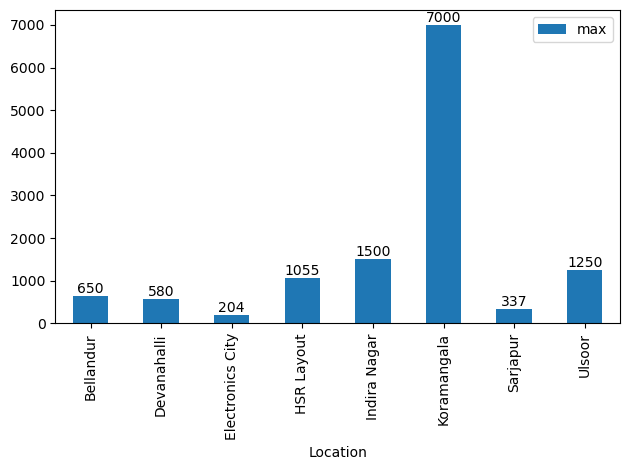

In [64]:
plt.figure(figsize=(12,3))

ax=df.groupby("Location")["PropertyPrice in lakhs"].agg(["max"]).plot(kind="bar")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()

**9.Show a difference in type of houses by using Multivariate.**

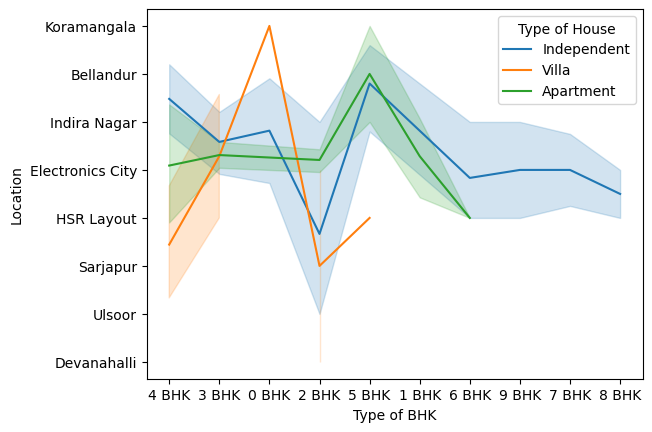

In [65]:
sns.lineplot(x = "Type of BHK", y = "Location", hue='Type of House', data = df)
plt.show()

In [66]:
df.groupby("Location")["Area in sq.ft"].agg(["min","max"])

,min,max
Location,,
Bellandur,953,6000
Devanahalli,1150,4400
Electronics City,520,9000
HSR Layout,920,9000
Indira Nagar,1036,9600
Koramangala,1000,15000
Sarjapur,670,3500
Ulsoor,618,10000


**10.What is the minimum price range and maximum price range in every area.**

<Figure size 1200x300 with 0 Axes>

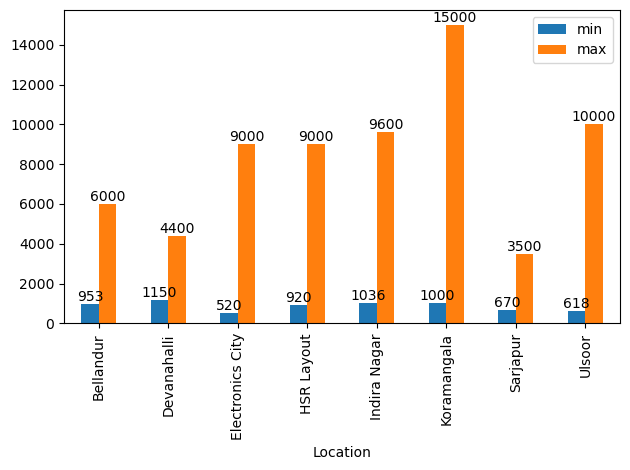

In [67]:
plt.figure(figsize=(12,3))

ax=df.groupby("Location")["Area in sq.ft"].agg(["min","max"]).plot(kind="bar")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()